<a href="https://colab.research.google.com/github/sohv/lung_cancer_detection/blob/sohcode/notebooks/lung_cancer_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import torch
from torch import nn
import torch
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet18
from torchvision.models import ResNet18_Weights

In [2]:
resnet18_model = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [3]:
resnet18_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
     transforms.RandomHorizontalFlip(p=0.7),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

In [5]:
import os
from torchvision import datasets, transforms

train_data_path = r"C:\Users\Ashish Mahendran\Downloads\archive (1)\Data\train"
test_data_path = r"C:\Users\Ashish Mahendran\Downloads\archive (1)\Data\test"

train_data = datasets.ImageFolder(root=train_data_path, transform=data_transform)
test_data = datasets.ImageFolder(root=test_data_path, transform=data_transform)

print(f"Number of training samples: {len(train_data)}")
print(f"Number of test samples: {len(test_data)}")

Number of training samples: 613
Number of test samples: 315


In [6]:
train_data[np.random.randint(0 , len(train_data))]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 1)

In [7]:
len(train_data)  , len(test_data)

(613, 315)

In [8]:
class_names = train_data.classes
class_names

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

In [9]:
class_dict = train_data.class_to_idx
class_dict

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [10]:
# change the key names
old_key1 = 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
new_key1 = 'adenocarcinoma_left.lower.lobe'

old_key2 = 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
new_key2 = 'large.cell.carcinoma_left.hilum'

old_key3 = 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
new_key3 = 'squamous.cell.carcinoma_left.hilum'

# add new key-value pair
class_dict[new_key1] = class_dict[old_key1]
class_dict[new_key2] = class_dict[old_key2]
class_dict[new_key3] = class_dict[old_key3]

# remove old key-value pair
del class_dict[old_key1]
del class_dict[old_key2]
del class_dict[old_key3]

print(class_dict)

{'normal': 2, 'adenocarcinoma_left.lower.lobe': 0, 'large.cell.carcinoma_left.hilum': 1, 'squamous.cell.carcinoma_left.hilum': 3}


In [11]:
class_names[0]=new_key1
class_names[1]=new_key2
class_names[3]=new_key3
class_names

['adenocarcinoma_left.lower.lobe',
 'large.cell.carcinoma_left.hilum',
 'normal',
 'squamous.cell.carcinoma_left.hilum']

In [12]:
random_idx = torch.randint(0, len(train_data), size=(1,)).item()
img, label = train_data[random_idx][0], train_data[random_idx][1]

print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")
print(f"class name: {class_names[label]}")

Image tensor:
 tensor([[[0., 0., 0.,  ..., 1., 1., 0.],
         [1., 1., 1.,  ..., 1., 1., 0.],
         [1., 1., 1.,  ..., 1., 1., 0.],
         ...,
         [0., 1., 1.,  ..., 1., 1., 1.],
         [0., 1., 1.,  ..., 1., 1., 1.],
         [0., 1., 1.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 1., 1., 0.],
         [1., 1., 1.,  ..., 1., 1., 0.],
         [1., 1., 1.,  ..., 1., 1., 0.],
         ...,
         [0., 1., 1.,  ..., 1., 1., 1.],
         [0., 1., 1.,  ..., 1., 1., 1.],
         [0., 1., 1.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 1., 1., 0.],
         [1., 1., 1.,  ..., 1., 1., 0.],
         [1., 1., 1.,  ..., 1., 1., 0.],
         ...,
         [0., 1., 1.,  ..., 1., 1., 1.],
         [0., 1., 1.,  ..., 1., 1., 1.],
         [0., 1., 1.,  ..., 0., 0., 0.]]])
Image shape: torch.Size([3, 224, 224])
Image datatype: torch.float32
Image label: 0
Label datatype: <class 'int'>
class name: adenocarcinoma_left.lower.lobe


Image permute: torch.Size([224, 224, 3]) 


Text(0.5, 1.0, 'adenocarcinoma_left.lower.lobe')

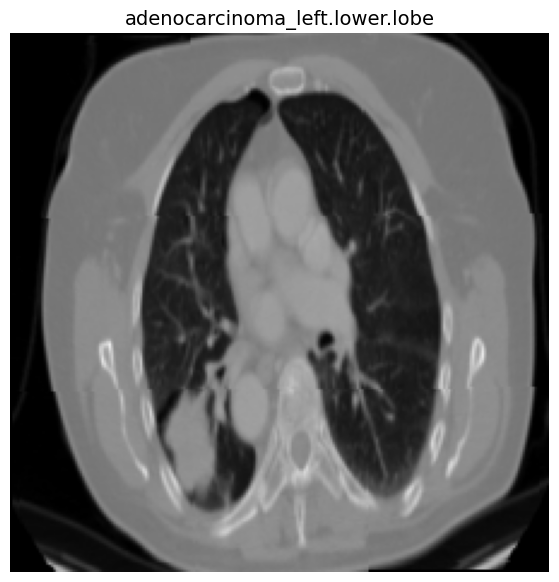

In [13]:
import random
from PIL import Image
import matplotlib.pyplot as plt
random_idx = torch.randint(0, len(train_data), size=(1,)).item()
img, label = train_data[random_idx][0], train_data[random_idx][1]


img_permute = img.permute(1, 2, 0)
print(f"Image permute: {img_permute.shape} ")
plt.figure(figsize=(12, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

**Data Loader**

In [14]:
BATCH_SIZE=32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x22ad33bddc0>,
 <torch.utils.data.dataloader.DataLoader at 0x22ad33bdd90>)

In [15]:
resnet18_model.fc = nn.Sequential (
    nn.Linear(512,512),
    nn.Dropout(0.2),
     nn.Linear(512,256),
    nn.Linear(256,len(class_names)),
)
resnet18_model.fc

Sequential(
  (0): Linear(in_features=512, out_features=512, bias=True)
  (1): Dropout(p=0.2, inplace=False)
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): Linear(in_features=256, out_features=4, bias=True)
)

In [16]:
resnet18_model.conv1 = nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [17]:
from torch.optim import lr_scheduler
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18_model.parameters(), lr=0.01)
optimizer = torch.optim.SGD(resnet18_model.parameters(), lr=0.01, momentum=0.9)

In [18]:
!pip install torchinfo

  Using cached torchinfo-1.8.0-py3-none-any.whl.metadata (21 kB)
Using cached torchinfo-1.8.0-py3-none-any.whl (23 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from torchinfo import summary
summary(resnet18_model, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 4]                    --
├─Conv2d: 1-1                            [1, 64, 32, 32]           9,408
├─BatchNorm2d: 1-2                       [1, 64, 32, 32]           128
├─ReLU: 1-3                              [1, 64, 32, 32]           --
├─MaxPool2d: 1-4                         [1, 64, 16, 16]           --
├─Sequential: 1-5                        [1, 64, 16, 16]           --
│    └─BasicBlock: 2-1                   [1, 64, 16, 16]           --
│    │    └─Conv2d: 3-1                  [1, 64, 16, 16]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 16, 16]           128
│    │    └─ReLU: 3-3                    [1, 64, 16, 16]           --
│    │    └─Conv2d: 3-4                  [1, 64, 16, 16]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 16, 16]           128
│    │    └─ReLU: 3-6                    [1, 64, 16, 16]           --
│

In [20]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  model.train()

  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    optimizer.zero_grad() # optimizer
    loss.backward()
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [21]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  model.eval()

  test_loss, test_acc = 0,  0

  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      test_pred_logits = model(X)
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [22]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

c:\Users\Ashish Mahendran\Downloads\archive (1)\en4\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
NUM_EPOCHS = 20
model_0_results = train(model=resnet18_model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

  5%|▌         | 1/20 [00:38<12:07, 38.31s/it]

Epoch: 0 | Train loss: 1.0863 | Train acc: 0.4919 | Test loss: 1.9340 | Test acc: 0.3031


 10%|█         | 2/20 [01:16<11:24, 38.05s/it]

Epoch: 1 | Train loss: 0.7760 | Train acc: 0.6597 | Test loss: 1.4503 | Test acc: 0.4688


 15%|█▌        | 3/20 [01:54<10:45, 37.98s/it]

Epoch: 2 | Train loss: 0.5152 | Train acc: 0.7994 | Test loss: 1.9506 | Test acc: 0.3469


 20%|██        | 4/20 [02:31<10:04, 37.76s/it]

Epoch: 3 | Train loss: 0.4908 | Train acc: 0.8091 | Test loss: 1.4414 | Test acc: 0.5256


 25%|██▌       | 5/20 [03:09<09:29, 37.97s/it]

Epoch: 4 | Train loss: 0.5121 | Train acc: 0.8259 | Test loss: 0.6847 | Test acc: 0.7204


 30%|███       | 6/20 [03:47<08:51, 37.99s/it]

Epoch: 5 | Train loss: 0.3880 | Train acc: 0.8619 | Test loss: 0.8758 | Test acc: 0.6501


 35%|███▌      | 7/20 [04:24<08:08, 37.58s/it]

Epoch: 6 | Train loss: 0.3573 | Train acc: 0.8494 | Test loss: 2.4151 | Test acc: 0.5793


 40%|████      | 8/20 [05:03<07:37, 38.09s/it]

Epoch: 7 | Train loss: 0.3832 | Train acc: 0.8719 | Test loss: 0.5889 | Test acc: 0.7692


 45%|████▌     | 9/20 [05:41<06:58, 38.09s/it]

Epoch: 8 | Train loss: 0.1930 | Train acc: 0.9313 | Test loss: 0.3473 | Test acc: 0.8926


 50%|█████     | 10/20 [06:19<06:19, 37.97s/it]

Epoch: 9 | Train loss: 0.1764 | Train acc: 0.9384 | Test loss: 0.7619 | Test acc: 0.7278


 55%|█████▌    | 11/20 [06:57<05:42, 38.09s/it]

Epoch: 10 | Train loss: 0.3348 | Train acc: 0.8759 | Test loss: 0.8068 | Test acc: 0.7372


 60%|██████    | 12/20 [07:37<05:08, 38.51s/it]

Epoch: 11 | Train loss: 0.1896 | Train acc: 0.9353 | Test loss: 0.5888 | Test acc: 0.8008


 65%|██████▌   | 13/20 [08:16<04:30, 38.65s/it]

Epoch: 12 | Train loss: 0.1341 | Train acc: 0.9578 | Test loss: 0.4125 | Test acc: 0.8502


 70%|███████   | 14/20 [08:55<03:53, 38.87s/it]

Epoch: 13 | Train loss: 0.0816 | Train acc: 0.9703 | Test loss: 0.4920 | Test acc: 0.8346


 75%|███████▌  | 15/20 [09:35<03:14, 38.98s/it]

Epoch: 14 | Train loss: 0.1266 | Train acc: 0.9713 | Test loss: 0.7288 | Test acc: 0.7931


 80%|████████  | 16/20 [10:14<02:36, 39.13s/it]

Epoch: 15 | Train loss: 0.2002 | Train acc: 0.9306 | Test loss: 1.0508 | Test acc: 0.7271


 85%|████████▌ | 17/20 [10:52<01:56, 38.78s/it]

Epoch: 16 | Train loss: 0.1942 | Train acc: 0.9328 | Test loss: 0.5067 | Test acc: 0.8389


 90%|█████████ | 18/20 [11:29<01:16, 38.41s/it]

Epoch: 17 | Train loss: 0.1342 | Train acc: 0.9500 | Test loss: 0.6409 | Test acc: 0.7997


 95%|█████████▌| 19/20 [12:08<00:38, 38.44s/it]

Epoch: 18 | Train loss: 0.0823 | Train acc: 0.9734 | Test loss: 0.5218 | Test acc: 0.8667


100%|██████████| 20/20 [12:47<00:00, 38.36s/it]

Epoch: 19 | Train loss: 0.0351 | Train acc: 0.9875 | Test loss: 0.5748 | Test acc: 0.8167


In [34]:
torch.save(resnet18_model.state_dict(), "1chest-ctscan_model.pth")

# Testing

In [25]:
import torch
import torchvision.models as models
import torch.nn as nn

# Load ResNet18 and customize it
resnet18_model = models.resnet18()
resnet18_model.fc = nn.Sequential(
    nn.Linear(512, 512),
    nn.Dropout(0.2),
    nn.Linear(512, 256),
    nn.Linear(256, 4)  # len(class_names) should be set to 4
)
resnet18_model.conv1 = nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet18_model.load_state_dict(torch.load("chest-ctscan_model.pth"))
resnet18_model.eval()


C:\Users\Ashish Mahendran\AppData\Local\Temp\ipykernel_8840\689555474.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet18_model.load_state_dict(torch.load("chest-c

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [37]:
from torchvision import transforms
from PIL import Image

# Define the required transformations
preprocess = transforms.Compose([
    transforms.Resize(size=(224, 224)),
     transforms.RandomHorizontalFlip(p=0.7),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])
# Load and preprocess the image
image_path =r"C:\Users\Ashish Mahendran\Downloads\archive (1)\Data\test\squamous.cell.carcinoma\000115 (4).png"
input_image = Image.open(image_path).convert("RGB")
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)  # Create a batch dimension

In [38]:
with torch.no_grad():
    output = resnet18_model(input_batch)
    _, predicted_class = torch.max(output, 1)  # Get the predicted class index

print(f"Predicted class: {predicted_class.item()}")

Predicted class: 3


In [40]:
import os
import torch
from torchvision import transforms
from PIL import Image

# Set your model to evaluation mode
resnet18_model.eval()

# Define your transformation function
preprocess = transforms.Compose([
    transforms.Resize(size=(224, 224)),
     transforms.RandomHorizontalFlip(p=0.7),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

# Directory containing your test images
test_directory = r"C:\Users\Ashish Mahendran\Downloads\archive (1)\Data\test"  # Update this path

# List to store predictions
predictions = []

# Iterate through test images
for filename in os.listdir(test_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust based on your image formats
        # Load and transform the image
        image_path = os.path.join(test_directory, filename)
        input_image = Image.open(image_path).convert("RGB")
        input_tensor = preprocess(input_image)
        input_batch = input_tensor.unsqueeze(0)  # Create a batch dimension

        # Make prediction
        with torch.no_grad():
            output = resnet18_model(input_batch)
            _, predicted_class = torch.max(output, 1)  # Get the predicted class index

        # Append the result (filename and predicted class) to the predictions list
        predictions.append((filename, predicted_class.item()))

# Print all predictions
for filename, class_idx in predictions:
    print(f"Image: {filename}, Predicted Class: {class_idx}")

In [41]:
# Print all predictions
for filename, class_idx in predictions:
    print(f"Image: {filename}, Predicted Class: {class_idx}")